In [2]:
pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Divide the dataset into independent and dependent features

X  = dataset.iloc[:, 3:13] ## independent features
y = dataset.iloc[:, 13] ## all rows and thirteen column (dependent features)

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
## Feature Engineering

geography = pd.get_dummies(X['Geography'],drop_first=True) ##instaed of showing all the three columns, it will just show two
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
##concatenate variables with dataframe

X = X.drop(['Geography', 'Gender'], axis = 1) ## we do not need to drop the rows, we will drop columns thatswhy axis = 1

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
X = pd.concat([X,geography,gender],axis = 1) ##this concat has also happen in column wise not row wise thatswhy axis=1

In [14]:
## till here we handled the categorical features

In [16]:
## Splitting the dataset and Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)


In [17]:
## feature scaling

from sklearn.preprocessing import StandardScaler ## based on the z-score

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [20]:
X_train.shape

(8000, 11)

In [21]:
 ### Lets' Create the Artificial Neural Network (ANN)

 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
 from tensorflow.keras.layers import Dropout

In [22]:
 ## let's initialize the ANN
 classifier = Sequential()

In [23]:
## Adding the input layer
classifier.add(Dense(units = 11,activation = 'relu')) ##for next layers relu will be activated

In [24]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [25]:
## Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [26]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [28]:
## other way to give learning rate whatever we want
## import tensorflow
##opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
## Early stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [31]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3158 - accuracy: 0.8686 - val_loss: 0.3671 - val_accuracy: 0.8573
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3154 - accuracy: 0.8699 - val_loss: 0.3685 - val_accuracy: 0.8584
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3151 - accuracy: 0.8675 - val_loss: 0.3676 - val_accuracy: 0.8573
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3153 - accuracy: 0.8698 - val_loss: 0.3703 - val_accuracy: 0.8538
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3152 - accuracy: 0.8705 - val_loss: 0.3679 - val_accuracy: 0.8550
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3151 - accuracy: 0.8692 - val_loss: 0.3679 - val_accuracy: 0.8546
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3145 - accuracy: 0.8683 - val_loss: 0.3712 - val_accuracy:

In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

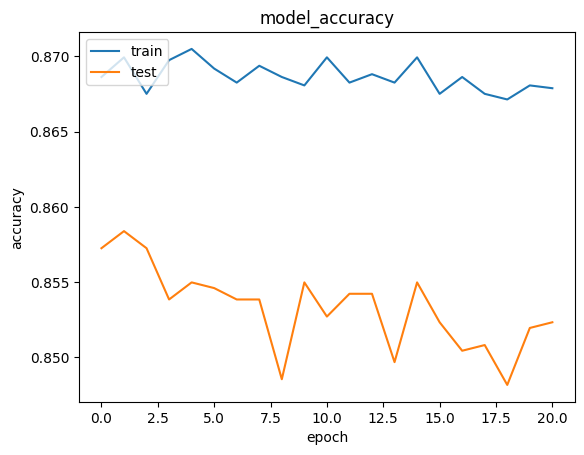

In [33]:
## Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

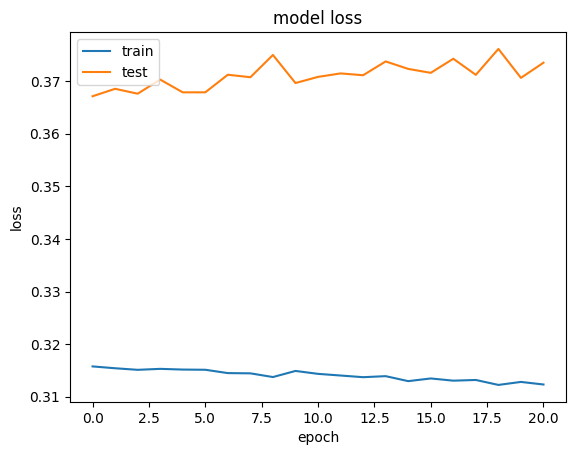

In [34]:
## Summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [36]:
## Making the Prediction and evaluating the model

## Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred =(y_pred >=0.5)

63/63 [==============================] - 0s 2ms/step


In [37]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1529,   66],
       [ 212,  193]])

In [38]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [39]:
score

0.861

In [40]:
## get the weights

classifier.get_weights()

[array([[-0.26202372, -0.49127904,  0.18694052, -0.09795607,  0.7402012 ,
         -0.22828671, -0.46175706,  0.05348502, -0.0942428 ,  0.22654015,
          0.12442762],
        [-0.70772505, -0.48476896, -0.3937138 ,  0.00963401,  0.11038934,
          0.8908769 ,  0.4844399 ,  0.16157608,  0.7382852 , -0.7827527 ,
          0.29749116],
        [ 0.25908318, -0.55730355, -0.38347748, -0.5562376 ,  0.05232219,
          0.2749612 , -0.05105917,  0.02902899,  0.01366109,  0.10595574,
         -0.06086466],
        [-0.30880213,  0.12631151, -0.123533  ,  0.31916308, -0.87173444,
         -0.12913823, -0.03860182, -0.5706341 , -0.09060488, -0.00350082,
         -0.76228195],
        [-0.3956628 , -0.5687701 , -0.3312796 , -0.1565193 ,  0.43360803,
         -0.35587218, -0.45651996, -1.182945  ,  1.288976  , -0.85751754,
         -0.44379064],
        [-0.30430436, -0.1867625 , -0.25626513, -0.29040766,  0.46988136,
          0.18043374, -0.01265165, -0.13128707, -0.14276612,  0.4346522